In [1]:
import pandas as pd 
import numpy as np
import codecs 

In [2]:
with codecs.open('amazon_dataset_1.csv','r',encoding='utf-8',errors='ignore') as f:
    dataset=pd.read_csv(f)
    

In [3]:
import math 
l=math.floor(len(dataset))

In [4]:
l

21000

In [5]:
dataset.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DOC_ID             21000 non-null  int64 
 1   LABEL              21000 non-null  object
 2   RATING             21000 non-null  int64 
 3   VERIFIED_PURCHASE  21000 non-null  object
 4   PRODUCT_CATEGORY   21000 non-null  object
 5   PRODUCT_ID         21000 non-null  object
 6   PRODUCT_TITLE      21000 non-null  object
 7   REVIEW_TITLE       21000 non-null  object
 8   REVIEW_TEXT        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [7]:
y=dataset.iloc[:,1]

In [8]:
y

0        __label1__
1        __label1__
2        __label1__
3        __label1__
4        __label1__
            ...    
20995    __label2__
20996    __label2__
20997    __label2__
20998    __label2__
20999    __label2__
Name: LABEL, Length: 21000, dtype: object

In [9]:
type(y)

pandas.core.series.Series

In [10]:
y=y.values

In [11]:
y

array(['__label1__', '__label1__', '__label1__', ..., '__label2__',
       '__label2__', '__label2__'], dtype=object)

In [13]:
import nltk 

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('maxent_treebank_pos_tagger')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TGE5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TGE5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\TGE5\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TGE5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [15]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle

In [16]:
c=[]
for i in range(0,l):
    review=re.sub('[^a-zA-Z]',' ',dataset['REVIEW_TEXT'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    c.append(review)

filename='corpus.sav'
pickle.dump(c,open(filename,'wb'))


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
x=cv.fit_transform(c).toarray()
filename='countvectorizer.sav'
pickle.dump(cv,open(filename,'wb'))

In [18]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
def pos_tagging(s):
    t_list=[]
    tags=[]
    countv=0
    countn=0
    text=nltk.word_tokenize(s)
    t_list=(nltk.pos_tag(text))

    tags=[k[1] for k in t_list]
    for j in tags:
        if j in ['VERB','VB','VBN','VBP','VBG','VBZ','VBD']:
            countv+=1
        elif j in ['NOUN','NN','NP','NUM','NNS','NNP','NNPS']:
            countn+=1
        else:
            continue
    if countv>countn:
        sentence='F'
    else:
        sentence='T'
    return(sentence)


In [20]:
w,h=2,l
pos_tag=[[0 for a in range(w)] for b in range(h)]
count=0
for i in range(0,l):
    text=dataset['REVIEW_TEXT'][i]
    sentence=pos_tagging(text)
    if sentence=='T':
        pos_tag[i][0]=1
        pos_tag[i][1]=0
    else:
        pos_tag[i][0]=0
        pos_tag[i][1]=1

filename='pos_tag.sav'
pickle.dump(pos_tag,open(filename,'wb'))


In [21]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
x=np.append(x,pos_tag,axis=1)

In [23]:
x

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)

In [25]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
x

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [46]:
w,h=3,l
new_col=[[0 for a in range(w)] for y in range(h)]

t=dict()
tcount=0

for i in range(0,l):
    new_col[i][0]=dataset['RATING'][i]
    new_col[i][1]=dataset['VERIFIED_PURCHASE'][i]
    new_col[i][2]=dataset['PRODUCT_CATEGORY'][i]

    if new_col[i][2] not in t.keys():
        t[new_col[i][2]]=1
        tcount+=1

new_col=np.array(new_col)


In [47]:
new_col

array([['4', 'N', 'PC'],
       ['4', 'Y', 'Wireless'],
       ['3', 'N', 'Baby'],
       ...,
       ['5', 'Y', 'Shoes'],
       ['5', 'Y', 'Shoes'],
       ['4', 'Y', 'Shoes']], dtype='<U22')

In [48]:
t

{'PC': 1,
 'Wireless': 1,
 'Baby': 1,
 'Office Products': 1,
 'Beauty': 1,
 'Health & Personal Care': 1,
 'Toys': 1,
 'Kitchen': 1,
 'Furniture': 1,
 'Electronics': 1,
 'Camera': 1,
 'Sports': 1,
 'Home': 1,
 'Jewelry': 1,
 'Books': 1,
 'Grocery': 1,
 'Video DVD': 1,
 'Tools': 1,
 'Home Improvement': 1,
 'Shoes': 1,
 'Outdoors': 1,
 'Luggage': 1,
 'Video Games': 1,
 'Apparel': 1,
 'Lawn and Garden': 1,
 'Pet Products': 1,
 'Home Entertainment': 1,
 'Musical Instruments': 1,
 'Watches': 1,
 'Automotive': 1}

In [49]:
le1=LabelEncoder()
new_col[:,0]=le1.fit_transform(new_col[:,0])
filename='le1.sav'
pickle.dump(le1,open(filename,'wb'))

In [50]:
new_col

array([['3', 'N', 'PC'],
       ['3', 'Y', 'Wireless'],
       ['2', 'N', 'Baby'],
       ...,
       ['4', 'Y', 'Shoes'],
       ['4', 'Y', 'Shoes'],
       ['3', 'Y', 'Shoes']], dtype='<U22')

In [51]:
new_col[:,1]=le1.fit_transform(new_col[:,1])
filename='le2.sav'
pickle.dump(le1,open(filename,'wb'))

In [52]:
new_col

array([['3', '0', 'PC'],
       ['3', '1', 'Wireless'],
       ['2', '0', 'Baby'],
       ...,
       ['4', '1', 'Shoes'],
       ['4', '1', 'Shoes'],
       ['3', '1', 'Shoes']], dtype='<U22')

In [53]:
new_col[:,2]=le1.fit_transform(new_col[:,2])
filename='le3.sav'
pickle.dump(le1,open(filename,'wb'))

In [54]:
new_col

array([['3', '0', '20'],
       ['3', '1', '29'],
       ['2', '0', '2'],
       ...,
       ['4', '1', '22'],
       ['4', '1', '22'],
       ['3', '1', '22']], dtype='<U22')

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct1=ColumnTransformer(
    [('Rating',OneHotEncoder(),[0])],remainder='passthrough'
)
new_col=ct1.fit_transform(new_col)
new_col=new_col.astype(np.float32)
filename='ct1.sav'
pickle.dump(ct1,open(filename,'wb'))


In [56]:
ct2=ColumnTransformer(
    [('Verified Purchase',OneHotEncoder(),[5])],remainder='passthrough'
)
new_col=ct2.fit_transform(new_col)
new_col=new_col.astype(np.float32)
filename='ct2.sav'
pickle.dump(ct2,open(filename,'wb'))

In [57]:
ct3=ColumnTransformer(
    [('Category',OneHotEncoder(),[7])],remainder='passthrough'
)
new_col=ct3.fit_transform(new_col)
new_col=new_col.toarray()
new_col=new_col.astype(np.float32)
filename='ct3.sav'
pickle.dump(ct3,open(filename,'wb'))

In [58]:
new_col=new_col.astype(np.uint8)

In [59]:
new_col

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [60]:
x

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [61]:
x=x.astype(np.uint8)

In [62]:
x=np.append(x,new_col,axis=1).astype(np.uint8)

In [63]:
new_col.shape

(21000, 37)

In [64]:
x.shape

(21000, 3039)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
x_train.shape

(16800, 3039)

In [67]:
x_test.shape

(4200, 3039)

In [68]:
y_train.shape

(16800,)

In [69]:
y_test.shape

(4200,)

In [70]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression()
classifier1.fit(x_train,y_train)

C:\Users\TGE5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
classifier2=KNeighborsClassifier()
classifier2.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier3=DecisionTreeClassifier()
classifier3.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier4=RandomForestClassifier()
classifier4.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
from sklearn.svm import SVC
classifier5=SVC()
classifier5.fit(x_train,y_train)

SVC()

In [76]:
from sklearn.metrics import accuracy_score
y_prediction1=classifier1.predict(x_test)
y_prediction2=classifier2.predict(x_test)
y_prediction3=classifier3.predict(x_test)
y_prediction4=classifier4.predict(x_test)
y_prediction5=classifier5.predict(x_test)

score1=accuracy_score(y_test,y_prediction1)
score2=accuracy_score(y_test,y_prediction2)
score3=accuracy_score(y_test,y_prediction3)
score4=accuracy_score(y_test,y_prediction4)
score5=accuracy_score(y_test,y_prediction5)


In [77]:
print(score1,score2,score3,score4,score5)

0.7907142857142857 0.6973809523809524 0.7345238095238096 0.8083333333333333 0.8142857142857143


In [78]:
filename='svm.sav'
pickle.dump(classifier5,open(filename,'wb'))

<BarContainer object of 5 artists>

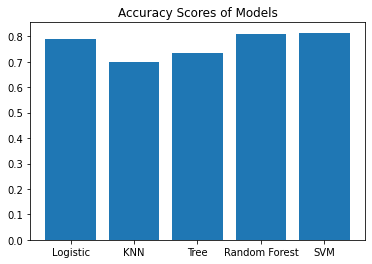

In [80]:
import matplotlib.pyplot as plt
data=[score1,score2,score3,score4,score5]
models=['Logistic','KNN','Tree','Random Forest','SVM']
plt.title('Accuracy Scores of Models')
plt.bar(models,data)

In [84]:
print('Logistic Regression Test score: ',score1*100)
print('KNN Test score: ',score2*100)
print('Decision Tree Test score: ',score3*100)
print('Random Forest Test score: ',score4*100)
print('SVM Test score: ',score5*100)



Logistic Regression Test score:  79.07142857142857
KNN Test score:  69.73809523809524
Decision Tree Test score:  73.45238095238096
Random Forest Test score:  80.83333333333333
SVM Test score:  81.42857142857143
